#Análisis de Webtoon y recomendaciones

##Importar liberías

In [627]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import plotly.express as px

In [628]:
import seaborn as sns

In [629]:
import plotly.graph_objects as go

##Carga de datos

In [630]:
data=pd.read_excel('webtoon_final.xlsx')
data.head()

,title_id,title,imagen_url,pag_url,genre,authors,weekdays,length,subscribers,rating,views,likes,status,daily_pass,synopsis
0,4598,Gemela desaparecida,https://swebtoon-phinf.pstatic.net/20220816_86...,https://www.webtoons.com/es/drama/vanishing-tw...,DRAMA,"Gaje,Dodal",WEDNESDAY,4,63822,9.53,216223,31111,ONGOING,False,Janghwa es la típica chica universitaria: lind...
1,4597,La basura en su lugar,https://swebtoon-phinf.pstatic.net/20220803_18...,https://www.webtoons.com/es/drama/trash-belong...,DRAMA,EDDiERiNG,WEDNESDAY,6,108708,9.71,563964,81905,ONGOING,False,Woobin es un experto en seducir a mujeres rica...
2,4595,Hecho de Polvo de Estrellas,https://swebtoon-phinf.pstatic.net/20220819_27...,https://www.webtoons.com/es/romance/hecho-de-p...,ROMANCE,Kalisami,MONDAY,4,61310,9.72,171510,24556,ONGOING,False,"Kalisa es una joven estrella del firmamento, c..."
3,4594,Reflejo del alma,https://swebtoon-phinf.pstatic.net/20210530_24...,https://www.webtoons.com/es/romance/reflejo-de...,ROMANCE,Magovi,TUESDAY,3,68428,9.85,180379,35401,ONGOING,False,Annie es una chica insegura y solitaria con mi...
4,4510,Nuestro hogar,https://swebtoon-phinf.pstatic.net/20220720_16...,https://www.webtoons.com/es/romance/our-house/...,ROMANCE,"Jinha,JIN Jongkyoung","WEDNESDAY,SUNDAY",11,38968,9.31,178647,29455,ONGOING,False,Hana es la hija del dueño de la pensión Cuatro...


In [631]:
data.shape

(317, 15)

In [632]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 317 entries, 0 to 316
Data columns (total 15 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   title_id     317 non-null    int64  
 1   title        317 non-null    object 
 2   imagen_url   317 non-null    object 
 3   pag_url      317 non-null    object 
 4   genre        317 non-null    object 
 5   authors      316 non-null    object 
 6   weekdays     317 non-null    object 
 7   length       317 non-null    int64  
 8   subscribers  317 non-null    int64  
 9   rating       317 non-null    float64
 10  views        317 non-null    int64  
 11  likes        317 non-null    int64  
 12  status       317 non-null    object 
 13  daily_pass   317 non-null    bool   
 14  synopsis     317 non-null    object 
dtypes: bool(1), float64(1), int64(5), object(8)
memory usage: 35.1+ KB


In [633]:
data.describe()

,title_id,length,subscribers,rating,views,likes
count,317.000000,317.000000,3.170000e+02,317.000000,3.170000e+02,3.170000e+02
mean,3147.375394,67.470032,3.094425e+05,9.688454,1.701456e+07,2.040119e+06
std,843.671741,86.976735,3.899575e+05,0.197025,3.731740e+07,3.533666e+06
min,1716.000000,1.000000,1.673300e+04,8.570000,6.337800e+04,1.149300e+04
25%,2444.000000,22.000000,9.827100e+04,9.630000,1.495496e+06,2.297770e+05
50%,3251.000000,49.000000,1.783660e+05,9.740000,4.799439e+06,7.071840e+05
75%,3794.000000,77.000000,3.392790e+05,9.820000,1.521993e+07,2.097921e+06
max,4598.000000,721.000000,3.285899e+06,9.930000,4.062923e+08,3.164553e+07


##Limpieza y tratamiento de datos

###Identificación y corrección de nulos

In [634]:
data.isnull().sum()

title_id       0
title          0
imagen_url     0
pag_url        0
genre          0
authors        1
weekdays       0
length         0
subscribers    0
rating         0
views          0
likes          0
status         0
daily_pass     0
synopsis       0
dtype: int64

In [635]:
data[data.isnull().any(axis=1)]

,title_id,title,imagen_url,pag_url,genre,authors,weekdays,length,subscribers,rating,views,likes,status,daily_pass,synopsis
90,3693,Mi compañero de cuarto es un kumiho,https://swebtoon-phinf.pstatic.net/20211207_10...,https://www.webtoons.com/es/romance/my-roommat...,ROMANCE,NaN,"MONDAY,WEDNESDAY",78,206320,9.75,8034860,1301961,ONGOING,False,Ahora una serie popular de acción real.\nEn ot...


Investigando se identifico que alias del autor es NA, sin embargo, python lo esta considerando como nulo, por lo que se reemplazara por otro nombre

In [636]:
data.loc[90,'authors']

nan

In [637]:
data.loc[90,'authors']='Na'

In [638]:
data.loc[90,:]

title_id                                                    3693
title                        Mi compañero de cuarto es un kumiho
imagen_url     https://swebtoon-phinf.pstatic.net/20211207_10...
pag_url        https://www.webtoons.com/es/romance/my-roommat...
genre                                                    ROMANCE
authors                                                       Na
weekdays                                        MONDAY,WEDNESDAY
length                                                        78
subscribers                                               206320
rating                                                      9.75
views                                                    8034860
likes                                                    1301961
status                                                   ONGOING
daily_pass                                                 False
synopsis       Ahora una serie popular de acción real.\nEn ot...
Name: 90, dtype: object

In [639]:
data.isnull().sum()

title_id       0
title          0
imagen_url     0
pag_url        0
genre          0
authors        0
weekdays       0
length         0
subscribers    0
rating         0
views          0
likes          0
status         0
daily_pass     0
synopsis       0
dtype: int64

In [640]:
data.value_counts('authors')

authors
HYBE                         3
Snailords                    2
MiTi,GUGU                    2
Jeongseo                     2
Hongjacga                    2
                            ..
Hyungwook Shin,Sunhee Kim    1
Hyun hoo Joo,Kumtata         1
Hyeon A Cho                  1
Hwang Han-yeong,I-room       1
uru-chan                     1
Length: 303, dtype: int64

In [641]:
data.value_counts('genre')

genre
ROMANCE          123
FANTASY           43
DRAMA             38
THRILLER          24
ACTION            21
COMEDY            19
HORROR            14
SUPERNATURAL       9
SLICE_OF_LIFE      8
SF                 6
SUPER_HERO         4
SPORTS             3
TIPTOON            3
HISTORICAL         2
dtype: int64

###Cálculo de actualizaciones por día

In [642]:
data.value_counts('weekdays')

weekdays
SATURDAY                                                    42
SUNDAY                                                      40
FRIDAY                                                      37
WEDNESDAY                                                   36
MONDAY                                                      36
TUESDAY                                                     33
THURSDAY                                                    33
MONDAY,TUESDAY,WEDNESDAY,THURSDAY,FRIDAY,SATURDAY,SUNDAY    24
MONDAY,THURSDAY                                              5
WEDNESDAY,SUNDAY                                             4
THURSDAY,SUNDAY                                              3
TUESDAY,FRIDAY                                               3
MONDAY,WEDNESDAY                                             3
FRIDAY,SUNDAY                                                2
TUESDAY,SUNDAY                                               2
TUESDAY,SATURDAY                              

In [643]:
dias=data.value_counts('weekdays')

In [644]:
dias=pd.DataFrame(dias,columns=['cantidad'])
dias.reset_index(inplace=True)
dias

,weekdays,cantidad
0,SATURDAY,42
1,SUNDAY,40
2,FRIDAY,37
3,WEDNESDAY,36
4,MONDAY,36
5,TUESDAY,33
6,THURSDAY,33
7,"MONDAY,TUESDAY,WEDNESDAY,THURSDAY,FRIDAY,SATUR...",24
8,"MONDAY,THURSDAY",5
9,"WEDNESDAY,SUNDAY",4


In [645]:
dias.columns.values

array(['weekdays', 'cantidad'], dtype=object)

In [646]:
dias['cantidad'] = dias['cantidad'].astype(int)

# Función para separar los días si hay más de uno
def separar_dias(row):
    dias = row['weekdays'].split(',')
    return pd.Series({dia.strip(): row['cantidad'] for dia in dias})

# Aplicar la función a cada fila del DataFrame
data_separada = dias.apply(separar_dias, axis=1).fillna(0)

# Sumar las ocurrencias de cada día individualmente
total_por_dia = data_separada.sum()

print(total_por_dia)

FRIDAY       75.0
MONDAY       76.0
SATURDAY     73.0
SUNDAY       78.0
THURSDAY     69.0
TUESDAY      67.0
WEDNESDAY    70.0
dtype: float64


In [647]:
total_por_dia=pd.DataFrame(total_por_dia,columns=['cantidad'])
total_por_dia.reset_index(inplace=True)

In [648]:
total_por_dia.columns = total_por_dia.columns.str.replace('index', 'dias')

In [649]:
total_por_dia.columns.values

array(['dias', 'cantidad'], dtype=object)

###Cálculo de actualizaciones por género

####Romance

In [650]:
dias_romance=data[data['genre']=='ROMANCE'].value_counts('weekdays')
dias_romance

weekdays
SATURDAY                                                    20
MONDAY                                                      17
FRIDAY                                                      17
SUNDAY                                                      16
TUESDAY                                                     13
WEDNESDAY                                                   11
MONDAY,TUESDAY,WEDNESDAY,THURSDAY,FRIDAY,SATURDAY,SUNDAY     8
THURSDAY                                                     8
MONDAY,THURSDAY                                              2
MONDAY,WEDNESDAY                                             2
TUESDAY,SATURDAY                                             2
MONDAY,FRIDAY                                                1
MONDAY,SATURDAY                                              1
MONDAY,SATURDAY,SUNDAY                                       1
FRIDAY,SUNDAY                                                1
THURSDAY,FRIDAY,SATURDAY                      

In [651]:
dias_romance=pd.DataFrame(dias_romance,columns=['cantidad'])
dias_romance.reset_index(inplace=True)
dias_romance

,weekdays,cantidad
0,SATURDAY,20
1,MONDAY,17
2,FRIDAY,17
3,SUNDAY,16
4,TUESDAY,13
5,WEDNESDAY,11
6,"MONDAY,TUESDAY,WEDNESDAY,THURSDAY,FRIDAY,SATUR...",8
7,THURSDAY,8
8,"MONDAY,THURSDAY",2
9,"MONDAY,WEDNESDAY",2


In [652]:
dias_romance.columns.values

array(['weekdays', 'cantidad'], dtype=object)

In [653]:
dias_romance['cantidad'] = dias_romance['cantidad'].astype(int)

def separar_dias(row):
    dias_list = row['weekdays'].split(',')
    return pd.Series({dia.strip(): row['cantidad'] for dia in dias_list})

# Aplicar la función a cada fila del DataFrame
data_separada = dias_romance.apply(separar_dias, axis=1).fillna(0)

# Sumar las ocurrencias de cada día individualmente
total_dias_romance = data_separada.sum()

print(total_dias_romance)


FRIDAY       29.0
MONDAY       32.0
SATURDAY     33.0
SUNDAY       27.0
THURSDAY     19.0
TUESDAY      24.0
WEDNESDAY    22.0
dtype: float64


In [654]:
total_dias_romance=pd.DataFrame(total_dias_romance,columns=['cantidad'])
total_dias_romance.reset_index(inplace=True)
total_dias_romance.columns = total_dias_romance.columns.str.replace('index', 'dias')
total_dias_romance.columns = total_dias_romance.columns.str.replace('cantidad', 'romance')
total_dias_romance.columns.values

array(['dias', 'romance'], dtype=object)

####Fantasia

In [655]:
dias_fantasy=data[data['genre']=='FANTASY'].value_counts('weekdays')
dias_fantasy

weekdays
SUNDAY                                                      8
THURSDAY                                                    8
FRIDAY                                                      5
MONDAY                                                      5
TUESDAY                                                     5
WEDNESDAY                                                   5
MONDAY,THURSDAY                                             2
SATURDAY                                                    2
MONDAY,TUESDAY,WEDNESDAY,THURSDAY,FRIDAY,SATURDAY,SUNDAY    1
THURSDAY,SUNDAY                                             1
TUESDAY,FRIDAY                                              1
dtype: int64

In [656]:
dias_fantasy=pd.DataFrame(dias_fantasy,columns=['cantidad'])
dias_fantasy.reset_index(inplace=True)

In [657]:
total_por_dia.columns = total_por_dia.columns.str.replace('index', 'dias')

In [658]:
dias_fantasy.columns.values

array(['weekdays', 'cantidad'], dtype=object)

In [659]:
dias_fantasy['cantidad'] = dias_fantasy['cantidad'].astype(int)

def separar_dias(row):
    dias_list = row['weekdays'].split(',')
    return pd.Series({dia.strip(): row['cantidad'] for dia in dias_list})

# Aplicar la función a cada fila del DataFrame
data_separada = dias_romance.apply(separar_dias, axis=1).fillna(0)

# Sumar las ocurrencias de cada día individualmente
total_dias_fantasy = data_separada.sum()

print(total_dias_fantasy)


FRIDAY       29.0
MONDAY       32.0
SATURDAY     33.0
SUNDAY       27.0
THURSDAY     19.0
TUESDAY      24.0
WEDNESDAY    22.0
dtype: float64


In [660]:
total_dias_fantasy=pd.DataFrame(total_dias_fantasy,columns=['cantidad'])
total_dias_fantasy.reset_index(inplace=True)
total_dias_fantasy.columns = total_dias_fantasy.columns.str.replace('index', 'dias')
total_dias_fantasy.columns = total_dias_fantasy.columns.str.replace('cantidad', 'fantasy')
total_dias_fantasy.columns.values

array(['dias', 'fantasy'], dtype=object)

####Drama

In [661]:
dias_drama=data[data['genre']=='DRAMA'].value_counts('weekdays')
dias_drama

weekdays
WEDNESDAY                                                   6
MONDAY                                                      5
MONDAY,TUESDAY,WEDNESDAY,THURSDAY,FRIDAY,SATURDAY,SUNDAY    5
THURSDAY                                                    5
FRIDAY                                                      4
TUESDAY                                                     4
SATURDAY                                                    3
SUNDAY                                                      2
MONDAY,FRIDAY,SATURDAY,SUNDAY                               1
THURSDAY,SUNDAY                                             1
TUESDAY,SUNDAY                                              1
TUESDAY,THURSDAY,FRIDAY                                     1
dtype: int64

In [662]:
dias_drama=pd.DataFrame(dias_drama,columns=['cantidad'])
dias_drama.reset_index(inplace=True)

In [663]:
dias_drama.columns.values

array(['weekdays', 'cantidad'], dtype=object)

In [664]:
dias_drama['cantidad'] = dias_drama['cantidad'].astype(int)

def separar_dias(row):
    dias_list = row['weekdays'].split(',')
    return pd.Series({dia.strip(): row['cantidad'] for dia in dias_list})

# Aplicar la función a cada fila del DataFrame
data_separada = dias_drama.apply(separar_dias, axis=1).fillna(0)

# Sumar las ocurrencias de cada día individualmente
total_dias_drama = data_separada.sum()

print(total_dias_drama)


FRIDAY       11.0
MONDAY       11.0
SATURDAY      9.0
SUNDAY       10.0
THURSDAY     12.0
TUESDAY      11.0
WEDNESDAY    11.0
dtype: float64


In [665]:
total_dias_drama=pd.DataFrame(total_dias_drama,columns=['cantidad'])
total_dias_drama.reset_index(inplace=True)
total_dias_drama.columns = total_dias_drama.columns.str.replace('index', 'dias')
total_dias_drama.columns = total_dias_drama.columns.str.replace('cantidad', 'drama')
total_dias_drama.columns.values

array(['dias', 'drama'], dtype=object)

####Thriller

In [666]:
dias_thriller=data[data['genre']=='THRILLER'].value_counts('weekdays')
dias_thriller

weekdays
MONDAY,TUESDAY,WEDNESDAY,THURSDAY,FRIDAY,SATURDAY,SUNDAY    5
SATURDAY                                                    5
WEDNESDAY                                                   5
SUNDAY                                                      3
TUESDAY                                                     3
FRIDAY                                                      1
MONDAY                                                      1
THURSDAY,SUNDAY                                             1
dtype: int64

In [667]:
dias_thriller=pd.DataFrame(dias_thriller,columns=['cantidad'])
dias_thriller.reset_index(inplace=True)

In [668]:
dias_thriller.columns.values

array(['weekdays', 'cantidad'], dtype=object)

In [669]:
dias_thriller['cantidad'] = dias_thriller['cantidad'].astype(int)

def separar_dias(row):
    dias_list = row['weekdays'].split(',')
    return pd.Series({dia.strip(): row['cantidad'] for dia in dias_list})

# Aplicar la función a cada fila del DataFrame
data_separada = dias_thriller.apply(separar_dias, axis=1).fillna(0)

# Sumar las ocurrencias de cada día individualmente
total_dias_thriller = data_separada.sum()

print(total_dias_thriller)


FRIDAY        6.0
MONDAY        6.0
SATURDAY     10.0
SUNDAY        9.0
THURSDAY      6.0
TUESDAY       8.0
WEDNESDAY    10.0
dtype: float64


In [670]:
total_dias_thriller=pd.DataFrame(total_dias_thriller,columns=['cantidad'])
total_dias_thriller.reset_index(inplace=True)
total_dias_thriller.columns = total_dias_thriller.columns.str.replace('index', 'dias')
total_dias_thriller.columns = total_dias_thriller.columns.str.replace('cantidad', 'thriller')

total_dias_thriller.columns.values

array(['dias', 'thriller'], dtype=object)

####Action

In [671]:
dias_action=data[data['genre']=='ACTION'].value_counts('weekdays')

In [672]:
dias_action=pd.DataFrame(dias_action,columns=['cantidad'])
dias_action.reset_index(inplace=True)

In [673]:
dias_action.columns.values

array(['weekdays', 'cantidad'], dtype=object)

In [674]:
dias_action['cantidad'] = dias_action['cantidad'].astype(int)

def separar_dias(row):
    dias_list = row['weekdays'].split(',')
    return pd.Series({dia.strip(): row['cantidad'] for dia in dias_list})

# Aplicar la función a cada fila del DataFrame
data_separada = dias_action.apply(separar_dias, axis=1).fillna(0)

# Sumar las ocurrencias de cada día individualmente
total_dias_action = data_separada.sum()

print(total_dias_action)


FRIDAY       2.0
MONDAY       5.0
SATURDAY     5.0
SUNDAY       5.0
THURSDAY     6.0
TUESDAY      2.0
WEDNESDAY    4.0
dtype: float64


In [675]:
total_dias_action=pd.DataFrame(total_dias_action,columns=['cantidad'])
total_dias_action.reset_index(inplace=True)
total_dias_action.columns = total_dias_action.columns.str.replace('index', 'dias')
total_dias_action.columns = total_dias_action.columns.str.replace('cantidad', 'action')

total_dias_action.columns.values

array(['dias', 'action'], dtype=object)

####Comedy

In [676]:
dias_comedy=data[data['genre']=='COMEDY'].value_counts('weekdays')

In [677]:
dias_comedy=pd.DataFrame(dias_comedy,columns=['cantidad'])
dias_comedy.reset_index(inplace=True)

In [678]:
dias_comedy.columns.values

array(['weekdays', 'cantidad'], dtype=object)

In [679]:
dias_comedy['cantidad'] = dias_comedy['cantidad'].astype(int)

def separar_dias(row):
    dias_list = row['weekdays'].split(',')
    return pd.Series({dia.strip(): row['cantidad'] for dia in dias_list})

# Aplicar la función a cada fila del DataFrame
data_separada = dias_comedy.apply(separar_dias, axis=1).fillna(0)

# Sumar las ocurrencias de cada día individualmente
total_dias_comedy = data_separada.sum()

print(total_dias_comedy)


FRIDAY       4.0
MONDAY       5.0
SATURDAY     3.0
SUNDAY       6.0
THURSDAY     3.0
TUESDAY      3.0
WEDNESDAY    4.0
dtype: float64


In [680]:
total_dias_comedy=pd.DataFrame(total_dias_comedy,columns=['cantidad'])
total_dias_comedy.reset_index(inplace=True)
total_dias_comedy.columns = total_dias_comedy.columns.str.replace('index', 'dias')
total_dias_comedy.columns = total_dias_comedy.columns.str.replace('cantidad', 'comedy')

total_dias_comedy.columns.values

array(['dias', 'comedy'], dtype=object)

####Horror

In [681]:
dias_horror=data[data['genre']=='HORROR'].value_counts('weekdays')
dias_horror=pd.DataFrame(dias_horror,columns=['cantidad'])
dias_horror.reset_index(inplace=True)

dias_horror.columns.values

dias_horror['cantidad'] = dias_horror['cantidad'].astype(int)

def separar_dias(row):
    dias_list = row['weekdays'].split(',')
    return pd.Series({dia.strip(): row['cantidad'] for dia in dias_list})

# Aplicar la función a cada fila del DataFrame
data_separada = dias_horror.apply(separar_dias, axis=1).fillna(0)

# Sumar las ocurrencias de cada día individualmente
total_dias_horror = data_separada.sum()

print(total_dias_horror)

FRIDAY       3.0
MONDAY       2.0
SATURDAY     2.0
SUNDAY       4.0
THURSDAY     3.0
TUESDAY      5.0
WEDNESDAY    3.0
dtype: float64


In [682]:
total_dias_horror=pd.DataFrame(total_dias_horror,columns=['cantidad'])
total_dias_horror.reset_index(inplace=True)
total_dias_horror.columns = total_dias_horror.columns.str.replace('index', 'dias')
total_dias_horror.columns = total_dias_horror.columns.str.replace('cantidad', 'horror')

total_dias_horror.columns.values

array(['dias', 'horror'], dtype=object)

####Supernatural

In [683]:
dias_supernatural=data[data['genre']=='SUPERNATURAL'].value_counts('weekdays')
dias_supernatural=pd.DataFrame(dias_supernatural,columns=['cantidad'])
dias_supernatural.reset_index(inplace=True)

dias_supernatural.columns.values

dias_supernatural['cantidad'] = dias_supernatural['cantidad'].astype(int)

def separar_dias(row):
    dias_list = row['weekdays'].split(',')
    return pd.Series({dia.strip(): row['cantidad'] for dia in dias_list})

# Aplicar la función a cada fila del DataFrame
data_separada = dias_supernatural.apply(separar_dias, axis=1).fillna(0)

# Sumar las ocurrencias de cada día individualmente
total_dias_supernatural = data_separada.sum()

print(total_dias_supernatural)

FRIDAY       2.0
SATURDAY     3.0
SUNDAY       1.0
THURSDAY     1.0
TUESDAY      2.0
WEDNESDAY    1.0
dtype: float64


In [684]:
total_dias_supernatural=pd.DataFrame(total_dias_supernatural,columns=['cantidad'])
total_dias_supernatural.reset_index(inplace=True)
total_dias_supernatural.columns = total_dias_supernatural.columns.str.replace('index', 'dias')
total_dias_supernatural.columns = total_dias_supernatural.columns.str.replace('cantidad', 'supernatural')

total_dias_supernatural.columns.values

array(['dias', 'supernatural'], dtype=object)

####SLICE_OF_LIFE

In [685]:
dias_SLICE_OF_LIFE=data[data['genre']=='SLICE_OF_LIFE'].value_counts('weekdays')
dias_SLICE_OF_LIFE=pd.DataFrame(dias_SLICE_OF_LIFE,columns=['cantidad'])
dias_SLICE_OF_LIFE.reset_index(inplace=True)

dias_SLICE_OF_LIFE.columns.values

dias_SLICE_OF_LIFE['cantidad'] = dias_SLICE_OF_LIFE['cantidad'].astype(int)

def separar_dias(row):
    dias_list = row['weekdays'].split(',')
    return pd.Series({dia.strip(): row['cantidad'] for dia in dias_list})

# Aplicar la función a cada fila del DataFrame
data_separada = dias_SLICE_OF_LIFE.apply(separar_dias, axis=1).fillna(0)

# Sumar las ocurrencias de cada día individualmente
total_dias_SLICE_OF_LIFE = data_separada.sum()

print(total_dias_SLICE_OF_LIFE)

FRIDAY       5.0
MONDAY       3.0
SATURDAY     1.0
SUNDAY       2.0
THURSDAY     4.0
TUESDAY      2.0
WEDNESDAY    2.0
dtype: float64


In [686]:
total_dias_SLICE_OF_LIFE=pd.DataFrame(total_dias_SLICE_OF_LIFE,columns=['cantidad'])
total_dias_SLICE_OF_LIFE.reset_index(inplace=True)
total_dias_SLICE_OF_LIFE.columns = total_dias_SLICE_OF_LIFE.columns.str.replace('index', 'dias')
total_dias_SLICE_OF_LIFE.columns = total_dias_SLICE_OF_LIFE.columns.str.replace('cantidad', 'Slice of life')

total_dias_SLICE_OF_LIFE.columns.values

array(['dias', 'Slice of life'], dtype=object)

####SF

In [687]:
dias_SF=data[data['genre']=='SF'].value_counts('weekdays')
dias_SF=pd.DataFrame(dias_SF,columns=['cantidad'])
dias_SF.reset_index(inplace=True)

dias_SF.columns.values

dias_SF['cantidad'] = dias_SF['cantidad'].astype(int)

def separar_dias(row):
    dias_list = row['weekdays'].split(',')
    return pd.Series({dia.strip(): row['cantidad'] for dia in dias_list})

# Aplicar la función a cada fila del DataFrame
data_separada = dias_SF.apply(separar_dias, axis=1).fillna(0)

# Sumar las ocurrencias de cada día individualmente
total_dias_SF = data_separada.sum()

print(total_dias_SF)

FRIDAY       3.0
MONDAY       1.0
SATURDAY     3.0
SUNDAY       2.0
THURSDAY     1.0
TUESDAY      1.0
WEDNESDAY    1.0
dtype: float64


In [688]:
total_dias_SF=pd.DataFrame(total_dias_SF,columns=['cantidad'])
total_dias_SF.reset_index(inplace=True)
total_dias_SF.columns = total_dias_SF.columns.str.replace('index', 'dias')
total_dias_SF.columns = total_dias_SF.columns.str.replace('cantidad', 'SF')

total_dias_SF.columns.values

array(['dias', 'SF'], dtype=object)

####Super heroes

In [689]:
dias_superhero=data[data['genre']=='SUPER_HERO'].value_counts('weekdays')
dias_superhero=pd.DataFrame(dias_superhero,columns=['cantidad'])
dias_superhero.reset_index(inplace=True)

dias_superhero.columns.values

dias_superhero['cantidad'] = dias_superhero['cantidad'].astype(int)

def separar_dias(row):
    dias_list = row['weekdays'].split(',')
    return pd.Series({dia.strip(): row['cantidad'] for dia in dias_list})

# Aplicar la función a cada fila del DataFrame
data_separada = dias_superhero.apply(separar_dias, axis=1).fillna(0)

# Sumar las ocurrencias de cada día individualmente
total_dias_superhero = data_separada.sum()

print(total_dias_superhero)

FRIDAY       1.0
MONDAY       1.0
THURSDAY     1.0
TUESDAY      1.0
WEDNESDAY    1.0
dtype: float64


In [690]:
total_dias_superhero=pd.DataFrame(total_dias_superhero,columns=['cantidad'])
total_dias_superhero.reset_index(inplace=True)
total_dias_superhero.columns = total_dias_superhero.columns.str.replace('index', 'dias')
total_dias_superhero.columns = total_dias_superhero.columns.str.replace('cantidad', 'superhero')

total_dias_superhero.columns.values

array(['dias', 'superhero'], dtype=object)

####Deportes

In [691]:
dias_sports=data[data['genre']=='SPORTS'].value_counts('weekdays')
dias_sports=pd.DataFrame(dias_sports,columns=['cantidad'])
dias_sports.reset_index(inplace=True)

dias_sports.columns.values

dias_sports['cantidad'] = dias_sports['cantidad'].astype(int)

def separar_dias(row):
    dias_list = row['weekdays'].split(',')
    return pd.Series({dia.strip(): row['cantidad'] for dia in dias_list})

# Aplicar la función a cada fila del DataFrame
data_separada = dias_sports.apply(separar_dias, axis=1).fillna(0)

# Sumar las ocurrencias de cada día individualmente
total_dias_sports = data_separada.sum()

print(total_dias_sports)

FRIDAY       1.0
SUNDAY       1.0
WEDNESDAY    1.0
dtype: float64


In [692]:
total_dias_sports=pd.DataFrame(total_dias_sports,columns=['cantidad'])
total_dias_sports.reset_index(inplace=True)
total_dias_sports.columns = total_dias_sports.columns.str.replace('index', 'dias')
total_dias_sports.columns = total_dias_sports.columns.str.replace('cantidad', 'sports')

total_dias_sports.columns.values

array(['dias', 'sports'], dtype=object)

####TIPTOON

In [693]:
dias_TIPTOON=data[data['genre']=='TIPTOON'].value_counts('weekdays')
dias_TIPTOON=pd.DataFrame(dias_TIPTOON,columns=['cantidad'])
dias_TIPTOON.reset_index(inplace=True)

dias_TIPTOON.columns.values

dias_TIPTOON['cantidad'] = dias_TIPTOON['cantidad'].astype(int)

def separar_dias(row):
    dias_list = row['weekdays'].split(',')
    return pd.Series({dia.strip(): row['cantidad'] for dia in dias_list})

# Aplicar la función a cada fila del DataFrame
data_separada = dias_TIPTOON.apply(separar_dias, axis=1).fillna(0)

# Sumar las ocurrencias de cada día individualmente
total_dias_tiptoon = data_separada.sum()

print(total_dias_tiptoon)

FRIDAY       1.0
MONDAY       1.0
SATURDAY     1.0
SUNDAY       1.0
THURSDAY     1.0
TUESDAY      1.0
WEDNESDAY    3.0
dtype: float64


In [694]:
total_dias_tiptoon=pd.DataFrame(total_dias_tiptoon,columns=['cantidad'])
total_dias_tiptoon.reset_index(inplace=True)
total_dias_tiptoon.columns = total_dias_tiptoon.columns.str.replace('index', 'dias')
total_dias_tiptoon.columns = total_dias_tiptoon.columns.str.replace('cantidad', 'tiptoon')
total_dias_tiptoon.columns.values

array(['dias', 'tiptoon'], dtype=object)

####Historico

In [695]:
dias_HISTORICAL=data[data['genre']=='HISTORICAL'].value_counts('weekdays')
dias_HISTORICAL=pd.DataFrame(dias_HISTORICAL,columns=['cantidad'])
dias_HISTORICAL.reset_index(inplace=True)

dias_HISTORICAL.columns.values

dias_HISTORICAL['cantidad'] = dias_HISTORICAL['cantidad'].astype(int)

def separar_dias(row):
    dias_list = row['weekdays'].split(',')
    return pd.Series({dia.strip(): row['cantidad'] for dia in dias_list})

# Aplicar la función a cada fila del DataFrame
data_separada = dias_HISTORICAL.apply(separar_dias, axis=1).fillna(0)

# Sumar las ocurrencias de cada día individualmente
total_dias_historical = data_separada.sum()

print(total_dias_historical)

MONDAY       1.0
WEDNESDAY    1.0
dtype: float64


In [696]:
total_dias_historical=pd.DataFrame(total_dias_historical,columns=['cantidad'])
total_dias_historical.reset_index(inplace=True)
total_dias_historical.columns = total_dias_historical.columns.str.replace('index', 'dias')
total_dias_historical.columns = total_dias_historical.columns.str.replace('cantidad', 'historical')
total_dias_historical.columns.values

array(['dias', 'historical'], dtype=object)

##Análisis de correlación

In [697]:
corr_matrix=data.corr().round(2)
corr_matrix

<ipython-input-697-44c1ae3a51ff>:1: FutureWarning:

The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.



,title_id,length,subscribers,rating,views,likes,daily_pass
title_id,1.00,-0.52,-0.42,-0.04,-0.47,-0.55,-0.10
length,-0.52,1.00,0.22,-0.03,0.40,0.51,-0.21
subscribers,-0.42,0.22,1.00,0.28,0.91,0.89,0.04
rating,-0.04,-0.03,0.28,1.00,0.17,0.20,0.00
views,-0.47,0.40,0.91,0.17,1.00,0.97,0.05
likes,-0.55,0.51,0.89,0.20,0.97,1.00,0.04
daily_pass,-0.10,-0.21,0.04,0.00,0.05,0.04,1.00


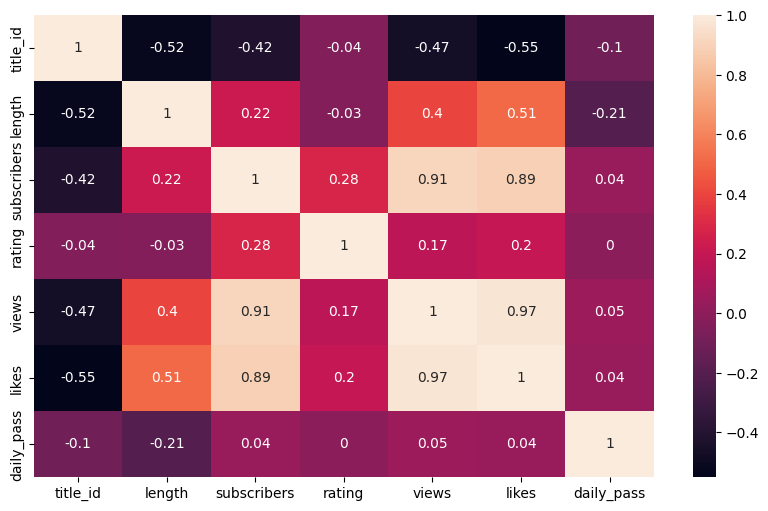

In [698]:
plt.figure(figsize=(10,6))
sns.heatmap(data=corr_matrix,annot=True,annot_kws={'size':10})
plt.show()

In [699]:
fig = px.scatter_matrix(data,
    dimensions=[ "length", "subscribers", "rating",'views','likes','daily_pass'])
fig.show()

##EDA

###Cantidad de actualizacion por día

In [700]:
fig = px.bar(total_por_dia, x='dias', y='cantidad', text_auto = True)
fig.update_traces(textfont_size = 14, textangle = 0, textposition = "inside")
fig.show()

###Cantidad de actualizaciones por género

In [701]:
tabla_combinada = pd.concat([total_dias_historical, total_dias_tiptoon,total_dias_superhero,total_dias_sports,total_dias_SF,total_dias_SLICE_OF_LIFE,total_dias_supernatural,total_dias_horror,total_dias_comedy,total_dias_action,total_dias_thriller,total_dias_drama,total_dias_fantasy,total_dias_romance], ignore_index=True)
tabla_combinada =tabla_combinada.fillna(0)
print(tabla_combinada)

         dias  historical  tiptoon  superhero  sports   SF  Slice of life  \
0      MONDAY         1.0      0.0        0.0     0.0  0.0            0.0   
1   WEDNESDAY         1.0      0.0        0.0     0.0  0.0            0.0   
2      FRIDAY         0.0      1.0        0.0     0.0  0.0            0.0   
3      MONDAY         0.0      1.0        0.0     0.0  0.0            0.0   
4    SATURDAY         0.0      1.0        0.0     0.0  0.0            0.0   
..        ...         ...      ...        ...     ...  ...            ...   
81   SATURDAY         0.0      0.0        0.0     0.0  0.0            0.0   
82     SUNDAY         0.0      0.0        0.0     0.0  0.0            0.0   
83   THURSDAY         0.0      0.0        0.0     0.0  0.0            0.0   
84    TUESDAY         0.0      0.0        0.0     0.0  0.0            0.0   
85  WEDNESDAY         0.0      0.0        0.0     0.0  0.0            0.0   

    supernatural  horror  comedy  action  thriller  drama  fantasy  romance

In [702]:
actualizacion_genero=tabla_combinada.groupby('dias').sum()
actualizacion_genero

,historical,tiptoon,superhero,sports,SF,Slice of life,supernatural,horror,comedy,action,thriller,drama,fantasy,romance
dias,,,,,,,,,,,,,,
FRIDAY,0.0,1.0,1.0,1.0,3.0,5.0,2.0,3.0,4.0,2.0,6.0,11.0,29.0,29.0
MONDAY,1.0,1.0,1.0,0.0,1.0,3.0,0.0,2.0,5.0,5.0,6.0,11.0,32.0,32.0
SATURDAY,0.0,1.0,0.0,0.0,3.0,1.0,3.0,2.0,3.0,5.0,10.0,9.0,33.0,33.0
SUNDAY,0.0,1.0,0.0,1.0,2.0,2.0,1.0,4.0,6.0,5.0,9.0,10.0,27.0,27.0
THURSDAY,0.0,1.0,1.0,0.0,1.0,4.0,1.0,3.0,3.0,6.0,6.0,12.0,19.0,19.0
TUESDAY,0.0,1.0,1.0,0.0,1.0,2.0,2.0,5.0,3.0,2.0,8.0,11.0,24.0,24.0
WEDNESDAY,1.0,3.0,1.0,1.0,1.0,2.0,1.0,3.0,4.0,4.0,10.0,11.0,22.0,22.0


###Cantidad de likes por género

In [703]:
fig = px.histogram(data, x='genre', y='likes', text_auto = True)
fig.update_traces(textfont_size = 14, textangle = 0, textposition = "outside")
fig.show()

###Cantidad de autores en cada género

In [704]:
cant_author_genre=data.groupby('genre')['authors'].count()
cant_author_genre=pd.DataFrame(cant_author_genre)
cant_author_genre.reset_index(inplace=True)
cant_author_genre.columns = cant_author_genre.columns.str.replace('index', 'genero')
cant_author_genre.columns.values

array(['genre', 'authors'], dtype=object)

In [705]:
fig = px.histogram(cant_author_genre, x='genre', y='authors', text_auto = True)
fig.update_traces(textfont_size = 14, textangle = 0, textposition = "outside")
fig.show()

###Diagramas relacionados a los datos numéricos y al tipo de pase

In [706]:
fig = px.scatter_matrix(data,
    dimensions=[ "length", "subscribers", "rating",'views','likes','daily_pass'],
    color="daily_pass")
fig.show()

###Diagramas relacionados a los datos numéricos y estado de publicación

In [707]:
fig = px.scatter_matrix(data,
    dimensions=[ "length", "subscribers", "rating",'views','likes','daily_pass'],
    color="status")
fig.show()

###Diagramas relacionados a los datos numéricos y los días de publicación

In [708]:
cant_views_weekdays=data.groupby('weekdays')['views'].sum()

In [709]:
cant_views_weekdays=pd.DataFrame(cant_views_weekdays,columns=['views'])
cant_views_weekdays.reset_index(inplace=True)
cant_views_weekdays.columns.values

array(['weekdays', 'views'], dtype=object)

In [710]:
cant_views_weekdays['views'] = cant_views_weekdays['views'].astype(int)

def separar_dias(row):
    dias_list = row['weekdays'].split(',')
    return pd.Series({dia.strip(): row['views'] for dia in dias_list})

# Aplicar la función a cada fila del DataFrame
data_separada = cant_views_weekdays.apply(separar_dias, axis=1).fillna(0)

# Sumar las ocurrencias de cada día individualmente
total_views_weekdays = data_separada.sum()
total_views_weekdays=pd.DataFrame(total_views_weekdays,columns=['views'])


,views
FRIDAY,1.005151e+09
MONDAY,1.072021e+09
SATURDAY,8.942413e+08
SUNDAY,1.215767e+09
THURSDAY,9.043760e+08
TUESDAY,1.205896e+09
WEDNESDAY,1.091978e+09


In [711]:
total_views_weekdays.reset_index(inplace=True)

In [712]:
total_views_weekdays.columns = total_views_weekdays.columns.str.replace('index', 'dias')
total_views_weekdays.columns.values

array(['dias', 'views'], dtype=object)

In [713]:
fig = px.histogram(total_views_weekdays, x='dias', y='views', text_auto = True)
fig.update_traces(textfont_size = 14, textangle = 0, textposition = "outside")
fig.show()

##Recomendación de webtoons en cada género

###TOP 10 por género

In [730]:
data.value_counts('genre')

genre
ROMANCE          123
FANTASY           43
DRAMA             38
THRILLER          24
ACTION            21
COMEDY            19
HORROR            14
SUPERNATURAL       9
SLICE_OF_LIFE      8
SF                 6
SUPER_HERO         4
SPORTS             3
TIPTOON            3
HISTORICAL         2
dtype: int64

In [757]:
genero_ingresado = input("Ingresa el género que deseas buscar: ")

# Filtrar los webtoons por el género ingresado
webtoons_filtrados = data[data['genre'] == genero_ingresado]

# Ordenar los webtoons filtrados por 'rating','likes','views' en orden descendente
webtoons_top_10 = webtoons_filtrados.sort_values(by=['rating','likes','views'], ascending=False).head(10)

# Mostrar los 10 mejores webtoons
print("Los 10 mejores webtoons del género", genero_ingresado, "son:")
print(webtoons_top_10[['title','rating','likes','views','length']])

Ingresa el género que deseas buscar: HORROR
Los 10 mejores webtoons del género HORROR son:
                               title  rating    likes     views  length
61              Relatos de fantasmas    9.91   437654   2208320      61
166                        Trastorno    9.87  1511556  14752540      48
293                            Uriah    9.82  1848661  12332678     105
173         Sobreviviendo al romance    9.80   889190   4451903      58
25                   Libre en sueños    9.78   420440   3681933      15
211                       Putrefacto    9.76   356925   1996688       6
254  Horang: Una colección de terror    9.73   403390   5840515      10
57                Clínica del terror    9.66  1807267  17708968      55
143                   Todo está bien    9.64  2440721  31516237      38
19            Fantasmas de la ciudad    9.63    27114    164527      12


###El mejor en cada género

In [756]:
genero_ingresado = input("Ingresa el género que deseas buscar: ")

# Filtrar los webtoons por el género ingresado
webtoons_filtrados = data[data['genre'] == genero_ingresado]

# Ordenar los webtoons filtrados por 'rating','likes','views' en orden descendente
webtoons_the_best = webtoons_filtrados.sort_values(by=['rating','likes','views'], ascending=False).head(1)

# Mostrar el mejor webtoon por genero
print("El mejor webtoon del género", genero_ingresado, "es:")
webtoons_the_best.reset_index(inplace=True)
title=webtoons_the_best.loc[0,'title']
daily_pass=webtoons_the_best.loc[0,'daily_pass']
length=webtoons_the_best.loc[0,'length']
sinopsis=webtoons_the_best.loc[0,'synopsis']
print('TITULO: ',title)
print('Daily pass: ',daily_pass)
print('Cantidad de capítulos: ',length)
print('SINOPSIS')
print(str(sinopsis))

Ingresa el género que deseas buscar: ACTION
El mejor webtoon del género ACTION es:
TITULO:  Mercenario adolescente
Daily pass:  False
Cantidad de capítulos:  87
SINOPSIS
A los ocho años, Ijin Yu perdió a sus padres en un accidente aéreo y quedó varado en un país extranjero, forzado a convertirse en mercenario para sobrevivir. Diez años después, regresa a su hogar para reunirse con su familia en Corea, en donde sobra la comida y todo parece estar en paz. Sin embargo, Ijin pronto descubrirá que la vida de adolescente es otro tipo de supervivencia. En su último año de secundaria, Ijin debe dominar nuevas tácticas para resistir en el campo de batalla escolar. ¿Podrá sobrevivir a su último año? ¿O podrá su escuela sobrevivir a él?
